**Importing libraries**

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset into a dataframe for manipulation**

In [1]:

data = pd.read_csv('/content/drive/MyDrive/Customer_Churn.csv')
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**Summary statistics and further information**

In [2]:
# Dataset's information (e.g., column names, data types)
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Checking the distribution of the target variable 'Churn'
print(data['Churn'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Encoding the data i.e. applying necessary feature engineering**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Defining features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Defining categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Scaling the training and test sets**

In [5]:
# Create a column transformer for preprocessing of variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Applying the preprocessor to the training and testing sets
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

**Exploratory Data Analysis to check distributions**

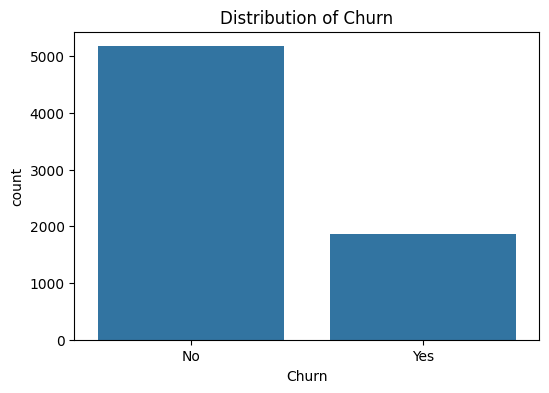

<ipython-input-8-ad2866b32e69>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


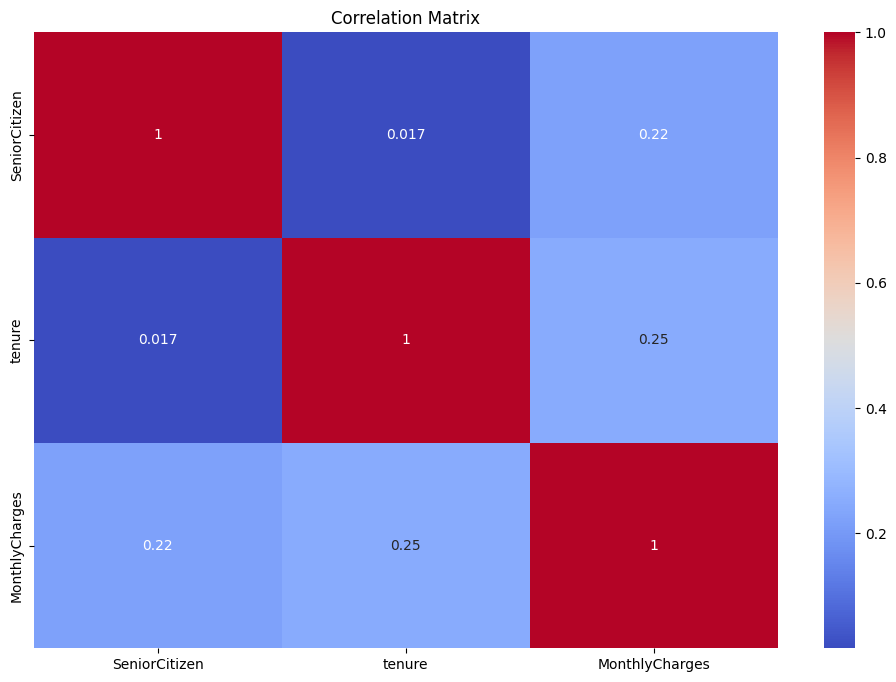

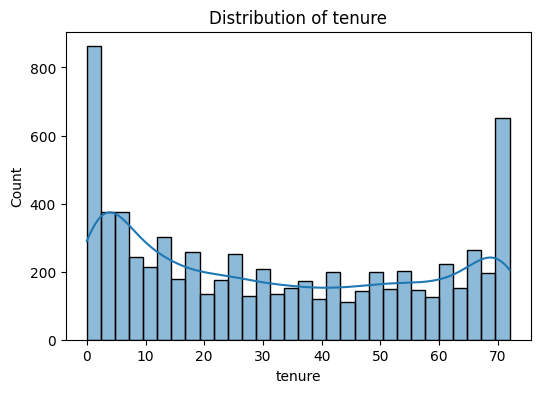

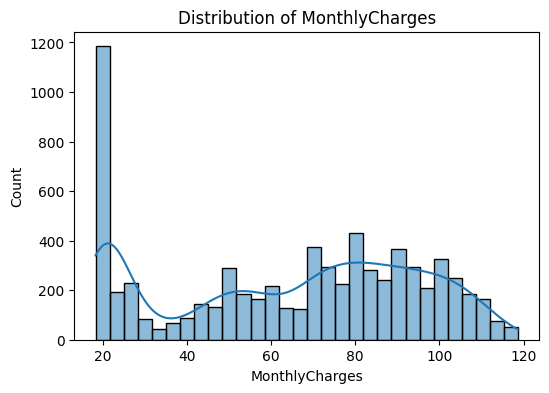

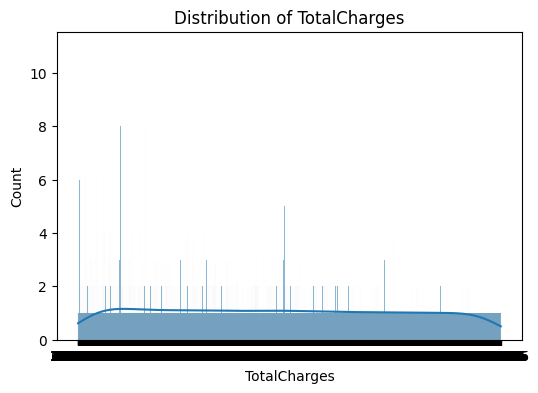

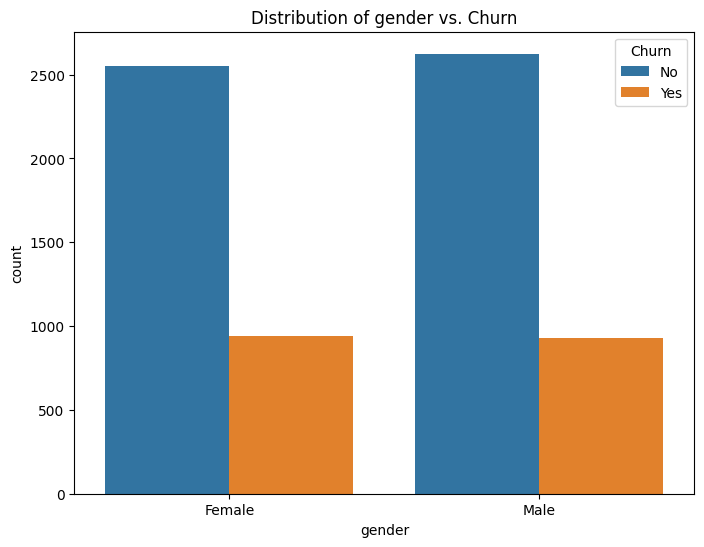

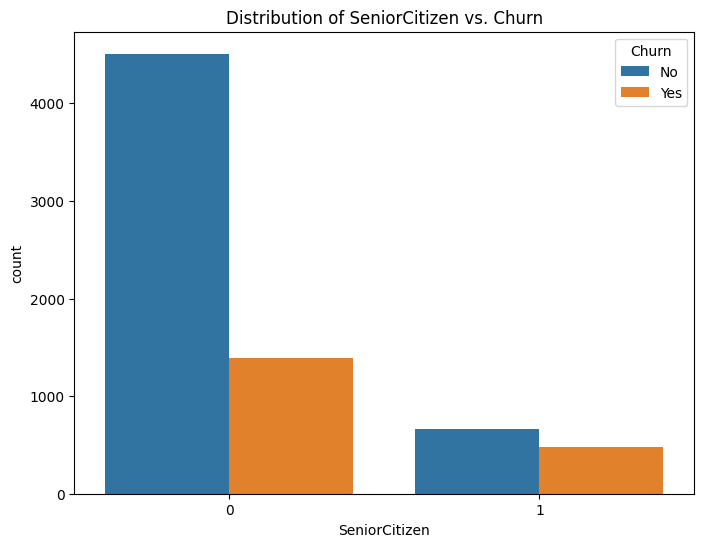

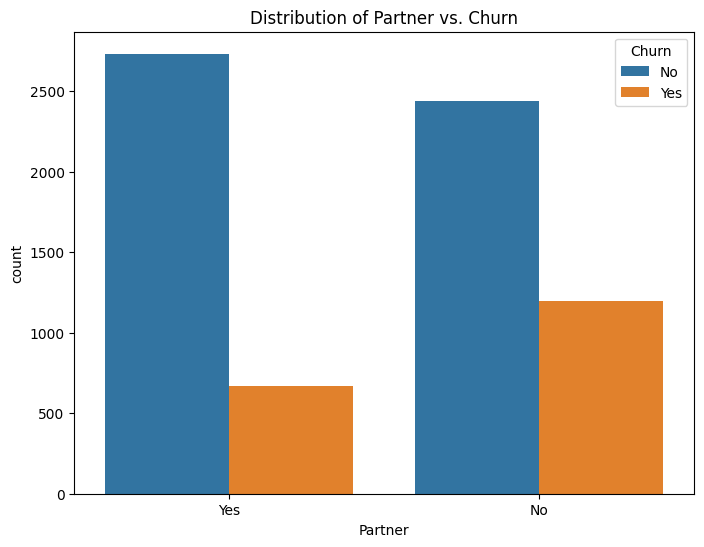

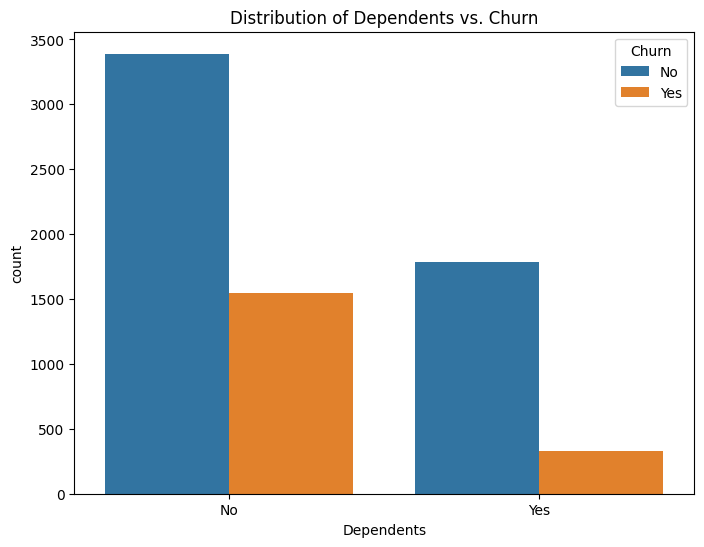

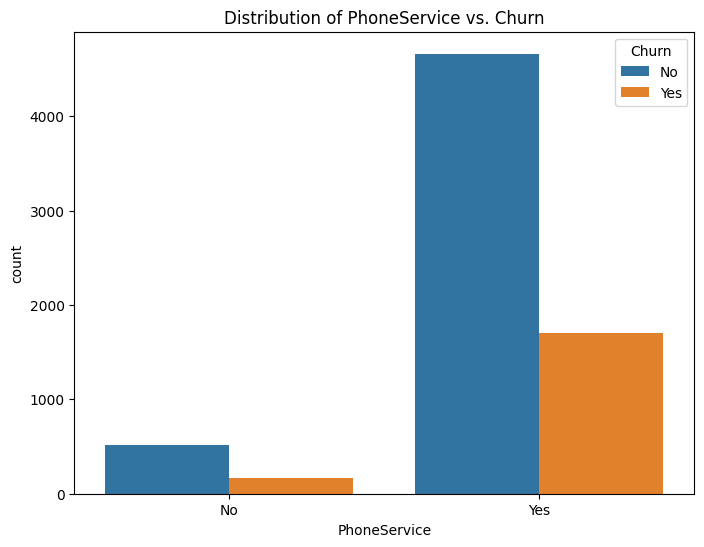

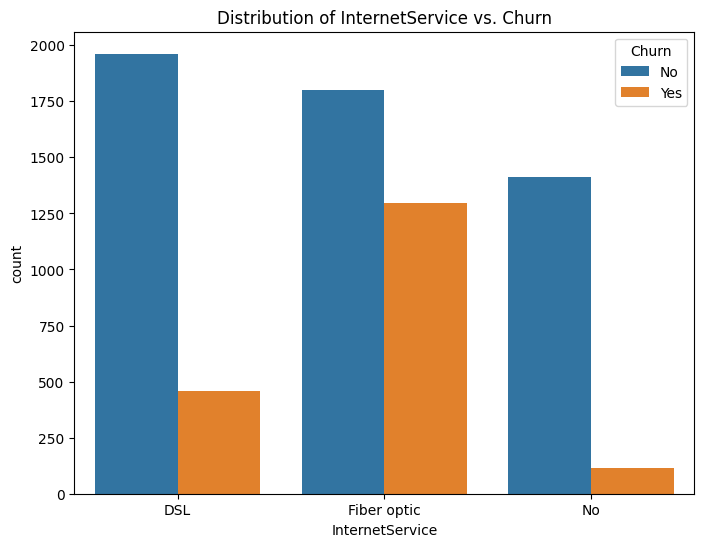

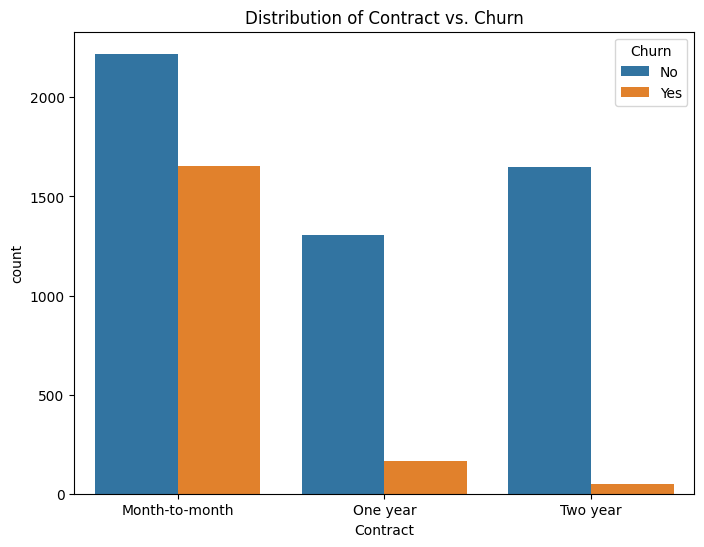

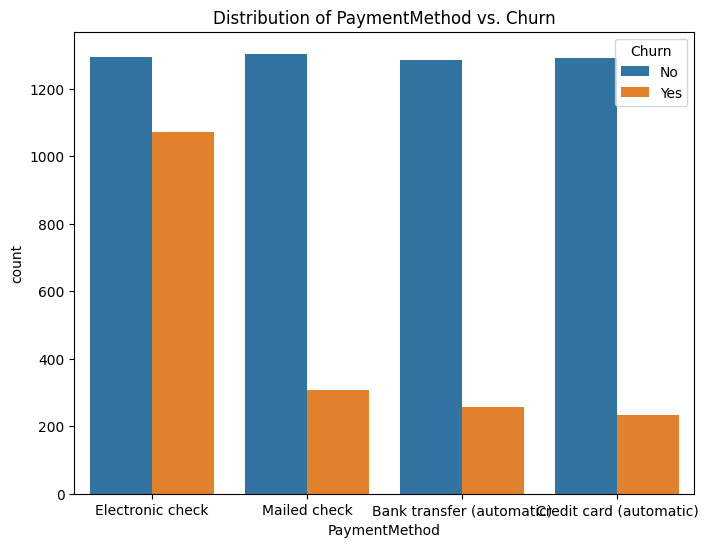

In [8]:
# Distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Relationship between 'Churn' and other variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Distribution of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'Distribution of {feature} vs. Churn')
    plt.show()

**Applying machine learning algorithms along with evaluation metrics**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the modeling
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Printing the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print("\n")


# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluating each model
for name, model in models.items():
    print(f"Training and evaluating {name}")
    train_and_evaluate_model(model, X_train_prep, y_train, X_test_prep, y_test)


Training and evaluating Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8254080908445706
Precision: 0.7015873015873015
Recall: 0.5924932975871313
F1 Score: 0.6424418604651162
ROC AUC Score: 0.8612302938710445


Accuracy: 0.8254080908445706
Precision: 0.7015873015873015
Recall: 0.5924932975871313
F1 Score: 0.6424418604651162
ROC AUC Score: 0.8612302938710445


Training and evaluating Decision Tree
Accuracy: 0.7778566359119943
Precision: 0.5974025974025974
Recall: 0.4932975871313673
F1 Score: 0.540381791483113
ROC AUC Score: 0.6868032337201238


Accuracy: 0.7778566359119943
Precision: 0.5974025974025974
Recall: 0.4932975871313673
F1 Score: 0.540381791483113
ROC AUC Score: 0.6868032337201238


Training and evaluating Random Forest
Accuracy: 0.8034066713981547
Precision: 0.6818181818181818
Recall: 0.48257372654155495
F1 Score: 0.5651491365777079
ROC AUC Score: 0.8452557785667706


Accuracy: 0.8034066713981547
Precision: 0.6818181818181818
Recall: 0.48257372654155495
F1 Score: 0.5651491365777079
ROC AUC Score: 0.8452557785667706


Training and evalu

**Checking feature importance**

In [15]:
#one-hot encoded feature names from the preprocessor
ohe_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Concatenate the numerical feature names with the one-hot encoded feature names
all_feature_names = list(numerical_features) + ohe_feature_names

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance scores
print("Feature Importance Scores:")
print(feature_importance_df)


Feature Importance Scores:
                      Feature  Importance
1              MonthlyCharges    0.073481
2                TotalCharges    0.054366
5669  Contract_Month-to-month    0.031303
5651        OnlineSecurity_No    0.021106
5660           TechSupport_No    0.020023
...                       ...         ...
263     customerID_0485-ZBSLN    0.000000
5841      TotalCharges_1102.4    0.000000
1345    customerID_2400-XIWIO    0.000000
2810    customerID_4957-SREEC    0.000000
6416      TotalCharges_1509.9    0.000000

[10978 rows x 2 columns]


**Recommendations**

In [17]:
#1. To entice consumers with greater monthly or total charges to stay, provide lower rates or exclusive promotions.
#2. Provide perks like lowered prices or more services to entice clients to move to longer-term agreements.
#3. Improve tech support and internet security while informing consumers about their significance.
#4. To guarantee general client happiness and retention, keep an eye on and handle difficulties pertaining to the less significant aspects.

